In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as co
import cosmoGW

a = np.logspace(-20, 2, 10000)

import plot_sets

In [2]:
##### compute Om_rad0

g0, g0s, T0, H0 = cosmoGW.values_0(h0=1)
g0_r, g0s_r, T0_r, H0_r = cosmoGW.values_0(h0=.6732)
g0 = 2 + 3*2*7/8*(4/11)**(4/3)
rho_c = 3*H0**2*co.c**2/8/np.pi/co.G
rho_c = rho_c.to(u.GeV/u.m**3)
rho_c_r = 3*H0_r**2*co.c**2/8/np.pi/co.G
rho_c_r = rho_c_r.to(u.GeV/u.m**3)
rho_rad0 = np.pi**2/30*g0*(T0.to(u.J))**4/(co.hbar*co.c)**3
rho_rad0 = rho_rad0.to(u.GeV/u.m**3)
Om_rad0 = rho_rad0/rho_c
Om_rad0_r = rho_rad0/rho_c_r

##### compute other contributions Om_Lam0 and Om_mat0, and total Om_tot

OmL0 = .6841
OmR0 = Om_rad0
OmR0_r = Om_rad0_r
OmM0 = 1 - OmL0 - OmR0
OmM0_r = 1 - OmL0 - OmR0_r
Om_tot = OmL0 + a**(-4)*OmR0 + a**(-3)*OmM0
Om_tot_r = OmL0 + a**(-4)*OmR0_r + a**(-3)*OmM0_r

In [3]:
#### compute the equation of state w

w = (1/3*OmR0*a**(-4) - OmL0)/(OmR0*a**(-4) + OmL0 + OmM0*a**(-3))
w_r = (1/3*OmR0_r*a**(-4) - OmL0)/(OmR0_r*a**(-4) + OmL0 + OmM0_r*a**(-3))

#### compute derivatives and second derivatives of a using Friedmanns' equations
add = -.5*Om_tot*H0**2*a*(1 + 3*w)
add_r = -.5*Om_tot_r*H0_r**2*a*(1 + 3*w_r)
ad = a*np.sqrt(Om_tot)*H0
ad_r = a*np.sqrt(Om_tot_r)*H0_r

app = .5*a**3*Om_tot*(1 - 3*w)*H0**2
app_r = .5*a**3*Om_tot_r*(1 - 3*w_r)*H0_r**2
ap = ad*a
ap_r = ad_r*a

In [4]:
#### compute the relativistic degrees of freedom as a function of T during the RD epoch
#### from a stored file

import os

os.chdir('PRD_2201_05630')

T = np.logspace(-4, 6, 1000)*u.MeV
gs_S = np.zeros(len(T))
gs = np.zeros(len(T))

for i in range(0, len(T)):
    gs_S[i] = cosmoGW.thermal_g(T=T[i], s=1, file=True)
    gs[i] = cosmoGW.thermal_g(T=T[i], s=0, file=True)
    
os.chdir('..')

### convert temperature and degrees of freedom into an array of scale factors using
### adiabatic expansion of the universe
as_T = (T0.to(u.MeV)/T)*(g0s/gs)**(1/3)

[]

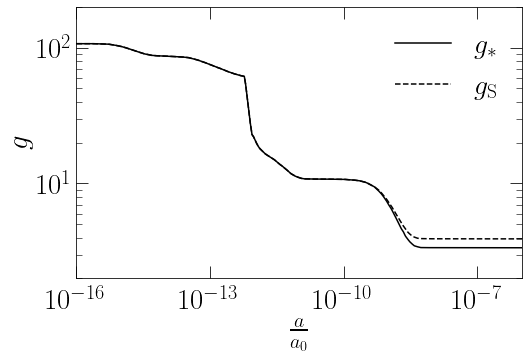

In [5]:
#### plot relativistic gs and adiabatic gs_S as a function of scale factor within RD era

plt.figure(figsize=(8, 5))

plt.plot(as_T, gs, color='black', label=r'$g_*$')
plt.plot(as_T, gs_S, color='black', ls='dashed', label=r'$g_{\rm S}$')

plot_sets.axes_lines()
plt.legend(frameon=False, loc='upper right', fontsize=28)

plt.xlim(1e-16, 1e-6)
plt.ylim(2, 200)

plt.xticks(np.logspace(-16, -6, 6))

plt.xlabel(r'${a\over a_0}$')
plt.ylabel(r'$g$')

plt.loglog()
#plt.savefig('friedmann/g_vs_a.pdf',
#            bbox_inches='tight')

In [6]:
#### convert arrays of degrees of freedom and interpolate to original array of scale factors a
#### (needs to be sorted first for interp to work)
inds = np.argsort(as_T)
as2 = as_T[inds]
g = gs[inds]
gS = gs_S[inds]
g = np.interp(a, as2, g)
gS = np.interp(a, as2, gS)

In [7]:
#### compute the total energy density Om_tot_g taking into account the modification on the dof
#### during RD era

OmR_g = OmR0*a**(-4)*(g/g0)*(gS/g0s)**(-4/3)
OmR_g_r = OmR0_r*a**(-4)*(g/g0)*(gS/g0s)**(-4/3)
Om_tot_g = OmL0 + OmR_g + a**(-3)*OmM0
Om_tot_g_r = OmL0 + OmR_g_r + a**(-3)*OmM0_r

#### recompute equation of state w and time derivatives of the scale factor
w_g = (1/3*OmR_g - OmL0)/(OmR_g + OmL0 + OmM0*a**(-3))
w_g_r = (1/3*OmR_g_r - OmL0)/(OmR_g_r + OmL0 + OmM0_r*a**(-3))

add_g = -.5*Om_tot_g*H0**2*a*(1 + 3*w_g)
add_g_r = -.5*Om_tot_g_r*H0_r**2*a*(1 + 3*w_g_r)
ad_g = a*np.sqrt(Om_tot_g)*H0
ad_g_r = a*np.sqrt(Om_tot_g_r)*H0_r
app_g = .5*a**3*Om_tot_g*(1 - 3*w_g)*H0**2
app_g_r = .5*a**3*Om_tot_g_r*(1 - 3*w_g_r)*H0_r**2
ap_g = ad_g*a
ap_g_r = ad_g_r*a

In [8]:
##### refine the local fluctuations of numerical data giving the ratio of rad energy
##### density with and without dofs

import spectra as sp

amax, Emax = sp.local_max(a[a>1e-10], Om_tot_g[a>1e-10]/Om_tot[a>1e-10])
#plt.plot(amax, Emax)
aa = np.append(a[a<=1e-10], amax)
Om_gg_rat = np.append(Om_tot_g[a<=1e-10]/Om_tot[a<=1e-10], Emax)
Om_gg_rat = np.interp(a, aa, Om_gg_rat)

#### recompute the energy densities
Om_tot_g = Om_gg_rat*Om_tot
Om_tot_g_r = Om_gg_rat*Om_tot_r

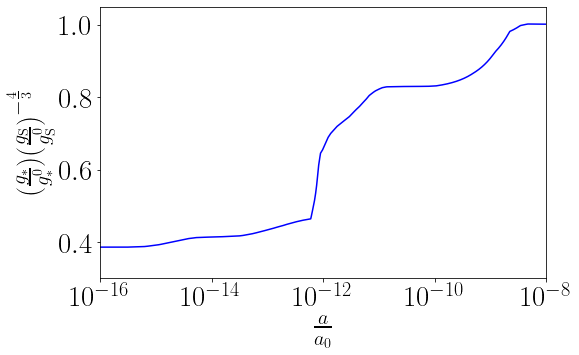

In [9]:
#### plot ratio between Om_rad with and without considering the modification on the total degrees of
#### freedom

plt.figure(figsize=(8, 5))

plt.xscale('log')
plt.ylim(0.3, 1.05)
plt.xlim(1e-16, 1e-8)

plt.xlabel(r'${a\over a_0}$')
plt.ylabel(r'$\Biggl(\frac{g_*}{g_*^0}\Biggr)\Biggl(\frac{g_{\rm S}}{g_{\rm S}^0}\Biggr)^{-{4\over3}}$')

plt.plot(a, Om_gg_rat, color='blue')
#plt.savefig('friedmann/rho_vs_a_rat.pdf',
#            bbox_inches='tight')

a_EQ =  0.00029123691675137636 , a_L =  0.7723048797037522


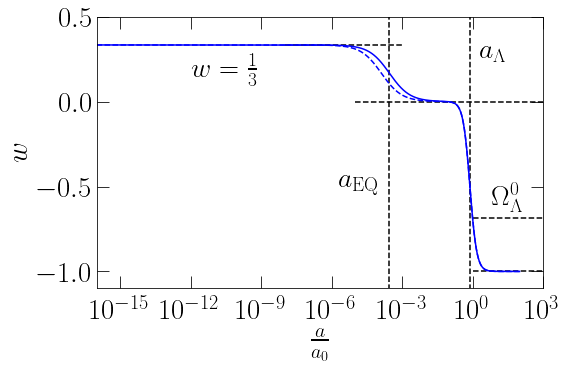

In [12]:
#### plot the evolution of the equation of state as a function of a

plt.figure(figsize=(8, 5))
plt.plot(a, w, color='blue', ls='dashed')
plt.plot(a, w_r, color='blue')

plt.hlines(1/3, 1e-8, 1e-3, color='black', ls='dashed')
plt.hlines(0, 1e-5, 1e7, color='black', ls='dashed')
plt.hlines(-1, 1e0, 2e7, color='black', ls='dashed')
plt.hlines(-OmL0, 1e0, 2e7, color='black', ls='dashed')

plt.text(6e0, -.6, r'$\Omega_{\Lambda}^0$', fontsize=28)
plt.text(1e-12, .15, r'$w = {1\over3}$', fontsize=28)

plt.xscale('log')
plt.ylim(-1.1, .5)
plt.xlim(1e-16, 1e3)

plt.xticks(np.logspace(-15, 3, 7))
plt.yticks(np.linspace(-1, .5, 4))

plot_sets.axes_lines()

plt.text(2e-6, -.5, r'$a_{\rm EQ}$', fontsize=28)
plt.text(2, .26, r'$a_{\Lambda}$', fontsize=28)

plt.xlabel(r'${a\over a_0}$')
plt.ylabel('$w$')

aEQ_r = a[np.argmin(abs(w_g_r - 1/6))]
aEQ = a[np.argmin(abs(w_g - 1/6))]

aL_r = a[np.argmin(abs(w_g_r + .5))]
aL = a[np.argmin(abs(w_g + .5))]

plt.vlines(aEQ_r, -2, 3, color='black', ls='dashed')
plt.vlines(aL_r, -2, 3, color='black', ls='dashed')

print('a_EQ = ', aEQ_r, ', a_L = ', aL_r)

#plt.savefig('friedmann/w_vs_a.pdf',
#            bbox_inches='tight')

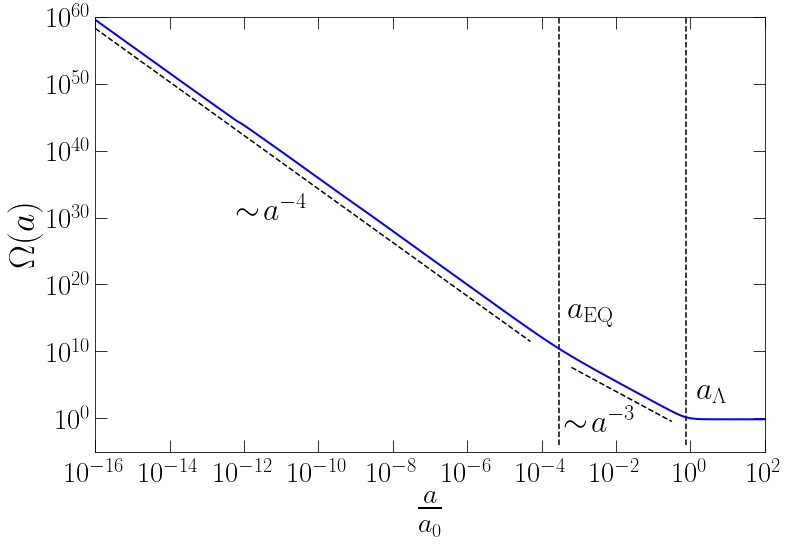

In [13]:
#### plot the evolution of the total energy density as a function of a

plt.figure(figsize=(12, 8))

plt.plot(a, Om_tot_g_r, lw=2, color='blue')

xx = np.logspace(-16, -4.3)
plt.plot(xx, .02*OmR0_r*(xx)**(-4), color='black', ls='dashed')

xx = np.logspace(-3.2, -.5)
plt.plot(xx, 1e-2*xx**(-3), color='black', ls='dashed')

plt.loglog()

plt.xticks(np.logspace(-16, 2, 10))
plt.yticks(np.logspace(0, 60, 7))
plt.xlim(1e-16, 1e2)
plt.ylim(1e-5, 1e60)

plt.text(6e-13, 5e29, r'$\sim\!a^{-4}$', fontsize=32)
plt.text(4e-4, 1e-2, r'$\sim\!a^{-3}$', fontsize=32)

plt.xlabel(r'${a\over a_0}$', fontsize=40)
plt.ylabel(r'$\Omega(a)$', fontsize=36)

plt.vlines(aEQ_r, 1e-4, 1e70, color='black', ls='dashed')
plt.vlines(aL_r, 1e-4, 1e70, color='black', ls='dashed')

plt.text(5e-4, 1e15, r'$a_{\rm EQ}$', fontsize=32)
plt.text(1.5, 1e3, r'$a_{\Lambda}$', fontsize=32)

plot_sets.axes_lines()

#plt.savefig('friedmann/rho_vs_a.pdf',
#            bbox_inches='tight')

In [14]:
#### numerically compute the arrays of cosmic and conformal times
#### from the energy density ratio

difft = np.zeros(len(a))
difft_r = np.zeros(len(a))
difft_g = np.zeros(len(a))
difft_g_r = np.zeros(len(a))
diffeta = np.zeros(len(a))
diffeta_r = np.zeros(len(a))
diffeta_g = np.zeros(len(a))
diffeta_g_r = np.zeros(len(a))
difft[0] = 0
diffeta[0] = 0
difft_r[0] = 0
diffeta_r[0] = 0
difft_g[0] = 0
diffeta_g[0] = 0
difft_g_r[0] = 0
diffeta_g_r[0] = 0

for i in range(1, len(a)):
    aas = np.logspace(np.log10(a[0]), np.log10(a[i]), 10000)
    Om_as = np.interp(aas, a, Om_tot)
    Om_as_r = np.interp(aas, a, Om_tot_r)
    Om_as_g = np.interp(aas, a, Om_tot_g)
    Om_as_g_r = np.interp(aas, a, Om_tot_g_r)
    fft = 1/aas/np.sqrt(Om_as)
    fft_r = 1/aas/np.sqrt(Om_as_r)
    fft_g = 1/aas/np.sqrt(Om_as_g)
    fft_g_r = 1/aas/np.sqrt(Om_as_g_r)
    ffeta = fft/aas
    ffeta_r = fft_r/aas
    ffeta_g = fft_g/aas
    ffeta_g_r = fft_g_r/aas
    #ffeta[np.where(aas > 1)] *= -1
    difft[i] = np.trapz(fft, aas)
    difft_r[i] = np.trapz(fft_r, aas)
    difft_g[i] = np.trapz(fft_g, aas)
    difft_g_r[i] = np.trapz(fft_g_r, aas)
    diffeta[i] = np.trapz(ffeta, aas)
    diffeta_r[i] = np.trapz(ffeta_r, aas)
    diffeta_g[i] = np.trapz(ffeta_g, aas)
    diffeta_g_r[i] = np.trapz(ffeta_g_r, aas)

Text(1e+16, -0.6989700043360187, '$\\sim\\!\\eta^2$')

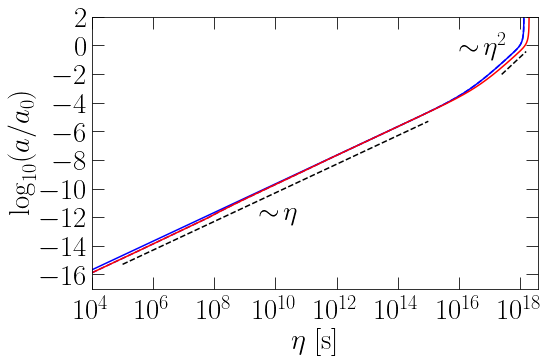

In [15]:
##### plot the conformal time evolution of the scale factor

plt.figure(figsize=(8, 5))

plt.plot(diffeta/H0, np.log10(a), color='blue')
plt.plot(diffeta_g/H0, np.log10(a), color='blue', ls='dashed')

plt.plot(diffeta_g_r/H0_r, np.log10(a), color='red')

plt.xscale('log')
plot_sets.axes_lines()
plt.xlabel(r'$\eta \ [$s$]$')
plt.ylabel(r'$\log_{10}(a/a_0)$')
plt.xlim(1e4, 4e18)
plt.ylim(1e-16, 1e2)
plt.ylim(-17, 2)
plt.xticks(np.logspace(4, 18, 8))
_ = plt.yticks(np.linspace(-16, 2, 10))

xx = np.logspace(5, 15)
plt.plot(xx, np.log10(5e-21*xx), color='black', ls='dashed')

xx = np.logspace(17.4, 18.2)
plt.plot(xx, np.log10(1.5e-37*xx**2), color='black', ls='dashed')

plt.text(3e9, np.log10(6e-13), r'$\sim\!\eta$', fontsize=28)
plt.text(1e16, np.log10(2e-1), r'$\sim\!\eta^2$', fontsize=28)

#plt.savefig('friedmann/a_vs_eta.pdf',
#            bbox_inches='tight')

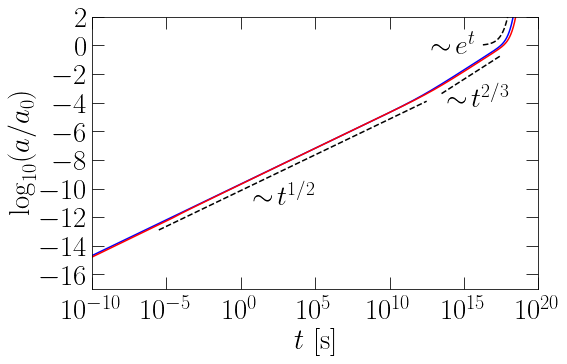

In [16]:
##### plot the cosmic time evolution of the scale factor

plt.figure(figsize=(8, 5))

plt.plot(difft/H0, np.log10(a), color='blue')
plt.plot(difft_g_r/H0_r, np.log10(a), color='red')

plt.xscale('log')
plot_sets.axes_lines()
plt.xlabel(r'$t \ [$s$]$')
plt.ylabel(r'$\log_{10}(a/a_0)$')
plt.xlim(1e-9, 2e19)
plt.ylim(-17, 2)
plt.xticks(np.logspace(-10, 20, 7))
_ = plt.yticks(np.linspace(-16, 2, 10))

plt.text(7e0, np.log10(8e-12), r'$\sim\!t^{1/2}$', fontsize=28)
plt.text(7e13, np.log10(5e-5), r'$\sim\!t^{2/3}$', fontsize=28)
plt.text(6e12, -.6, r'$\sim\!e^t$', fontsize=28)

xx = np.logspace(-23, -5)
plt.plot(xx/H0, np.log10(.04*np.sqrt(xx)), color='black', ls='dashed')

xx = np.logspace(-4, 0)
plt.plot(xx/H0, np.log10(.2*xx**(2/3)), color='black', ls='dashed')

xx = np.logspace(-1, 1)
plt.plot(.6*xx/H0, np.log10(np.exp(xx)), color='black', ls='dashed')

#plt.savefig('friedmann/a_vs_t.pdf',
#            bbox_inches='tight')

In [18]:
#### compute age of the Universe!!

tt = difft_g_r[np.argmin(abs(a - 1))]/H0_r
print('The age of the universe is: ', tt.to(u.Gyr))

The age of the universe is:  13.793951008954398 Gyr


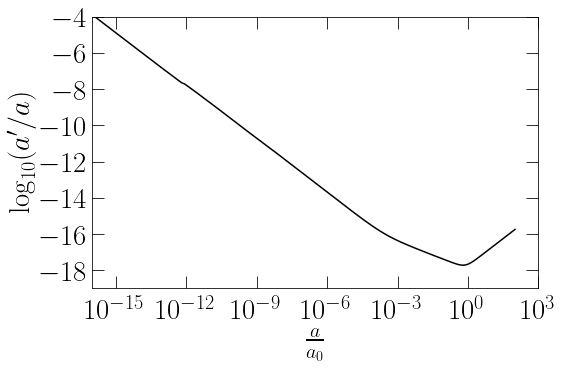

In [19]:
##### compute numerically ap and app and compare with exact values (they coincide!)
plt.figure(figsize=(8, 5))

plt.plot(a, np.log10(ap_g_r.value/a), color='black')
ap_n = np.zeros(len(a))
app_n = np.zeros(len(a))
for i in range(1, len(a)):
    ap_n[i] = (a[i] - a[i - 1])/(diffeta[i] - diffeta[i - 1])
    app_n[i] = (ap.value[i] - ap.value[i - 1])/(diffeta[i] - diffeta[i - 1])

plt.xscale('log')
plt.ylim(-19, -4)
plt.xticks(np.logspace(-15, 3, 7))
plt.xlim(1e-16, 1e3)
_ = plt.yticks(np.linspace(-18, -4, 8))
plt.xlabel(r'${a\over a_0}$')
plt.ylabel(r"$\log_{10} (a'/a)$")
plot_sets.axes_lines()

#plt.savefig('friedmann/ap_vs_eta.pdf',
#            bbox_inches='tight')

<ipython-input-20-3124a77e6a35>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(a, np.log10(app_g_r.value/a), color='black')


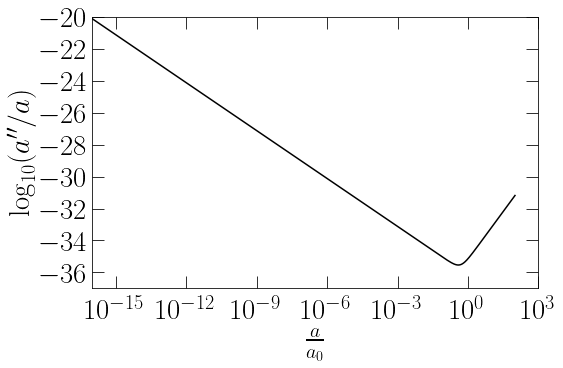

In [20]:
##### compute numerically ap and app and compare with exact values (they coincide!)
plt.figure(figsize=(8, 5))

plt.plot(a, np.log10(app_g_r.value/a), color='black')

#plt.loglog()
plt.xscale('log')
plt.ylim(-37, -20)
plt.xticks(np.logspace(-15, 3, 7))
plt.xlim(1e-16, 1e3)
_ = plt.yticks(np.linspace(-36, -20, 9))
plt.xlabel(r'${a\over a_0}$')
plt.ylabel(r"$\log_{10}(a''/a)$")
plot_sets.axes_lines()

#plt.savefig('friedmann/app_vs_eta.pdf',
#            bbox_inches='tight')

In [309]:
import pandas as pd
df = pd.DataFrame({'a': a, 't': difft_g_r/H0_r,
                   'eta': diffeta_g_r/H0_r, 'ap/a': ap_g_r/a,
                   'app/a': app_g_r/a})

In [311]:
df.to_csv('values_a_t_eta_ap_app.csv')